##Quantifying Halloween

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
tot = pd.read_csv("halloween_trick_or_treat.csv")
candy_count =  pd.read_csv("halloween_candy_count.csv")                 

## Decoratedness

In [53]:
tot.head()
tot.columns
tot = tot[['candies', 'pumpkin_count', 'additional_dec', 'level_of_decoratedness']]
tot.head()
avg_candies = tot.candies.mean()
avg_pumpkin_count = tot.pumpkin_count.mean()
median_additional_dec = tot.additional_dec.median()
avg_level_dec = tot.level_of_decoratedness.mean()
med_level_dec = tot.level_of_decoratedness.median()
tot.head()
print(avg_candies, avg_pumpkin_count, median_additional_dec, avg_level_dec, med_level_dec)

2.765957446808511 2.0638297872340425 1.0 2.702127659574468 2.0


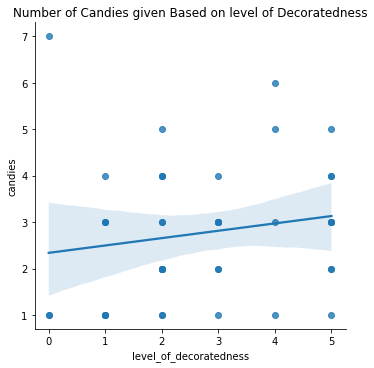

In [44]:
ax = sns.lmplot(x='level_of_decoratedness', y='candies', data = tot)
ax.set(title='Number of Candies given Based on level of Decoratedness')

plt.show()

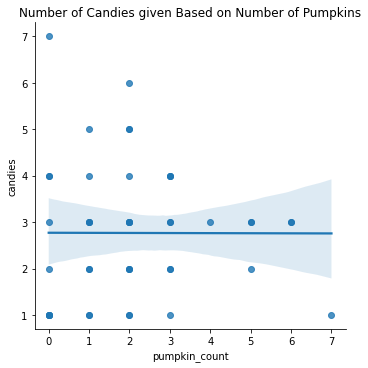

In [46]:
ax = sns.lmplot(x='pumpkin_count', y='candies', data = tot)
ax.set(title='Number of Candies given Based on Number of Pumpkins')

plt.show()

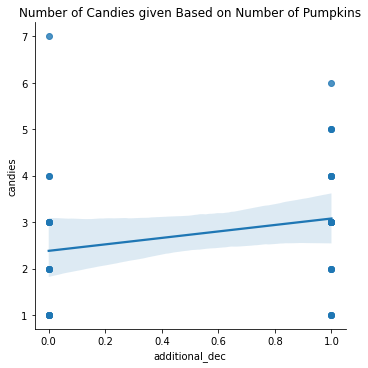

In [47]:
ax = sns.lmplot(x='additional_dec', y='candies', data = tot)
ax.set(title='Number of Candies given Based on Number of Pumpkins')

plt.show()

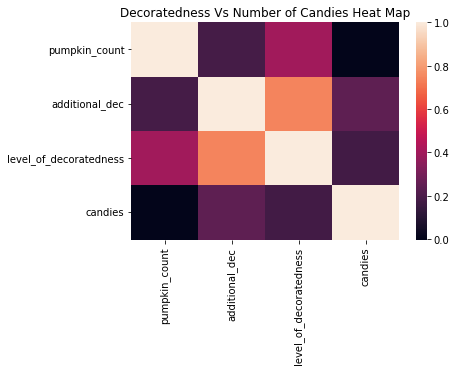

In [42]:
heat_data = tot[['pumpkin_count','additional_dec','level_of_decoratedness','candies']] 

heat_data_corr = heat_data.corr()

sns.heatmap(heat_data_corr)
plt.title('Decoratedness Vs Number of Candies Heat Map')

plt.show()

## Candy Counts

In [60]:
candy_count = candy_count.fillna(0)
candy_count = candy_count.rename(columns={'Unnamed: 0': "candy_type"})
candy_count.head()
candy_count['total'] = candy_count.j + candy_count.v + candy_count.c
candy_count['avg'] = round(candy_count.j + candy_count.v + candy_count.c)/3

In [68]:
candy_count.drop([36])

,candy_type,j,v,c,total,avg
26,popeyes,1,1,0.0,2.0,0.666667
35,airheads,0,0,2.0,2.0,0.666667
32,fizz,0,0,2.0,2.0,0.666667
34,foil chocolate,0,0,3.0,3.0,1.000000
9,sour punch,1,2,0.0,3.0,1.000000
31,full size,1,1,3.0,5.0,1.666667
19,twizlers,3,3,0.0,6.0,2.000000
11,crispy crunch,2,2,2.0,6.0,2.000000
16,herseys,4,3,0.0,7.0,2.333333
6,sour patch,2,3,2.0,7.0,2.333333


In [69]:
candy_count = candy_count.sort_values('avg')
candy_count.head()

,candy_type,j,v,c,total,avg
36,poprocks,0,0,0.0,0.0,0.000000
26,popeyes,1,1,0.0,2.0,0.666667
35,airheads,0,0,2.0,2.0,0.666667
32,fizz,0,0,2.0,2.0,0.666667
34,foil chocolate,0,0,3.0,3.0,1.000000


In [74]:
j_total = candy_count.j.sum()
v_total = candy_count.v.sum()
c_total = candy_count.c.sum()
print(j_total,v_total,c_total)

219 215 199.0


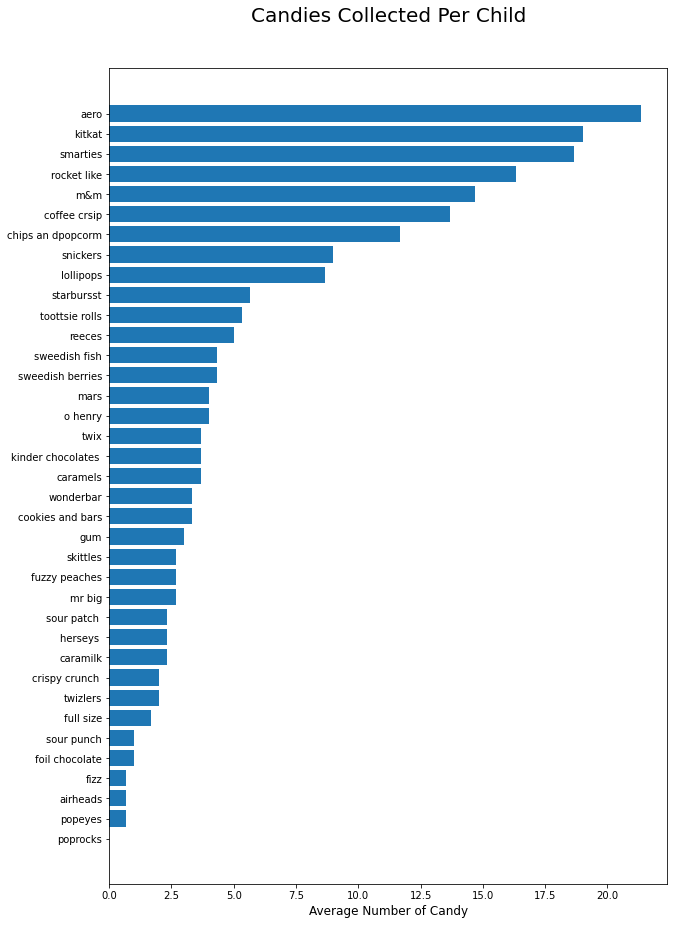

In [71]:
y = candy_count.avg

x = candy_count.candy_type

fig, ax = plt.subplots(figsize = (10,15))

ax.barh(x,y)
# ax.set_ylabel('Goals Scored', fontsize=12)
ax.set_xlabel('Average Number of Candy', fontsize=12)
ax.set_title('Candies Collected Per Child', fontsize=20, y=1.05)

plt.show()

In [1]:
from gensim.models import KeyedVectors
from gensim import models

word2vec_path = 'data/GoogleNews-vectors-negative300.bin.gz'
model = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
import gensim

In [2]:
vector = model['easy']

In [3]:
model.most_similar("Halloween")

[("Hallowe'en", 0.7621963024139404),
 ('All_Hallow_Eve', 0.7081517577171326),
 ('halloween', 0.6974977254867554),
 ('Halloween_costumes', 0.686757504940033),
 ('spooky_Halloween', 0.6733335256576538),
 ('Halloween_themed', 0.667896032333374),
 ('spooktacular', 0.651769757270813),
 ('Halloween_costume', 0.6450036764144897),
 ('POTY_Mouth', 0.6429769992828369),
 ('Hallow_Eve', 0.6384108662605286)]

In [6]:
model.similarity("Halloween","Aero")

0.043285985

In [7]:
model.similarity("Halloween","pumkin")

0.3634536

In [12]:
model.similarity("Halloween","candy")

0.39515406

In [13]:
# model.similarity("Halloween","Kit Kat") not present
# model.similarity("Halloween","coffeecrisp")
# model.similarity("Halloween","reece's")